<h2><center>
# Modelos de Análisis avanzados II
</center></h2> <h2><center>
 <img src="http://cioal.com/wp-content/uploads/sites/2/2015/02/Redes-de-aplicaciones-1024x768.jpg" >

# Taller 6

</center></h4>

Desarrollado por [Jhon Gonzalez](https://www.linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)

Universidad de los Andes

version 1.0, Septiembe 25 - 2018

# Inicialización de pesos

Entrenar una red neuronal requiere especificar unos valores iniciales para los pesos. Un método de inicialización bien elegido va a mejorar bastante el aprendizaje.  

En los talleres anteriores hemos implementado algunas inicializaciones que han dado buen resultado. Pero cómo se elige el método de inicialización para una red neuronal? En este taller vamos a ver cómo distintos métodos de inicialización llevan a obtener resultados diferentes.  

Un método de inicialización bien elegido permite:
- Incrementar la velocidad de convergencia de la búsqueda por los parámetros (mediante G.D) 
- Incrementar las probabilidades de que el método de búsqueda (G.D.) converja hacia un error de entrenamiento menor, y una mejor generalización  

Emepecemos cargando los paquetes y el conjunto de datos para su clasificación.

/Users/jfrank/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


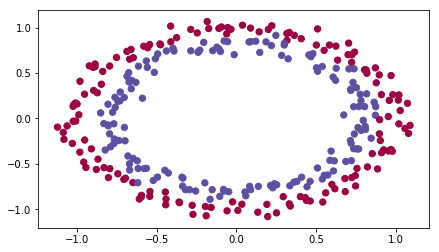

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # tamaño de los gráficos
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# cargamos los datos: puntos azules/{rojos en círculos
train_X, train_Y, test_X, test_Y = load_dataset()

Se quiere desarrollar un clasificador que separe los puntos azules de los rojos. 

## 1 - Modelo de red neuronal

Dada una red neuronal de 3 capas, experimente con los siguientes métodos de inicialización:  
- *Inicialización con ceros:*  se define `initialization = "zeros"` en el argumento de entrada.
- *Inicialización aleatoria:* se define `initialization = "random"` en el argumento de entrada. Los pesos se inicializan con valores aleatorios grandes.  
- *Inicialización de He:* se define `initialization = "he"` en el argumento de entrada. Los pesos se inicializan con valores aleatorios en una escala definida por He et al., 2015. 

**Instrucciones**: Ejecute el código a continuación. Luego implementará los tres métodos de inicialización a los que hace referencia la función `model()`.

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implementa una red neuronal de 3 capas: LINEAL->RELU->LINEAL->RELU->LINEAL->SIGMOIDE.
    Input:
    X: datos de entrada, con dimensión (2, número de ejemplos)
    Y: vector con las etiquetas observadas (contiene 0 para los puntos rojos y 1 para los azules), con dimensión (1, número de ejemplos)
    learning_rate: tasa de aprendizaje para el G.D. 
    num_iterations: número de iteraciones para ejecutar G.D.
    print_cost: si es verdadero (True), muestra el coste cada 1000 iteraciones
    initialization: permite elegir el método a utilizar ("zeros","random" or "he")
    Output:
    parameters: los parámetros aprendidos por el modelo
    """
        
    grads = {}
    costs = []     
    m = X.shape[1]        # número de ejemplos
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Inicializa los parámetros del diccionario.
    if initialization == "ceros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Bucle (G.D.)

    for i in range(0, num_iterations):

        # Propagación hacia delante: LINEAL -> RELU -> LINEAL -> RELU -> LINEAL -> SIGMOIDE.
        a3, cache = forward_propagation(X, parameters)
        
        # Pérdida
        cost = compute_loss(a3, Y)

        # Retro-propagación.
        grads = backward_propagation(X, Y, cache)
        
        # Actualización de parámetros.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Imprimir la pérdida cada 1000 iteraciones
        if print_cost and i % 1000 == 0:
            print("Coste tras la iteración {}: {}".format(i, cost))
            costs.append(cost)
            
    # grafica de la pérdida
    plt.plot(costs)
    plt.ylabel('Coste')
    plt.xlabel('Iteraciones ')
    plt.title("Tasa de aprendizaje =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 - Inicialización con ceros

Hay dos tipos de parámetros para inicializar una red neuronal:
- las matrices de pesos $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- los vectores de sesgo $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Ejercicio**: Implemente la siguiente función para incializar todos los parámetros a cero. Como hemos visto, esta inicialización no va a funcionar bien pues falla en "romper la simetría". Para verificarlo, utilice np.zeros((..,..)) con las dimensiones adecuadas.

In [4]:
# FUNCIÓN A CALIFICAR: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Inputs:
    layer_dims: arreglo (lista) python con el tamaño de cada capa.
    Output:
    parameters: diccionario python con los parámetros "W1", "b1", ..., "WL", "bL":
                    W1: matriz de pesos de dimensión (layers_dims[1], layers_dims[0])
                    b1: vector de sesgo de dimensión (layers_dims[1], 1)
                    ...
                    WL: matriz de pesos de dimensión  (layers_dims[L], layers_dims[L-1])
                    bL: vector de sesgo de dimensión (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # numero de capas de la red
    
    for l in range(1, L):
        ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 2 líneas de código)
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### TERMINE EL CÓDIGO AQUÍ ###
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


**Salida esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Ejecute la celda abajo para entrenar el modelo en 15,000 iteraciones utilizando la inicialización en ceros.

Coste tras la iteración 0: 0.6931471805599453
Coste tras la iteración 1000: 0.6931471805599453
Coste tras la iteración 2000: 0.6931471805599453
Coste tras la iteración 3000: 0.6931471805599453
Coste tras la iteración 4000: 0.6931471805599453
Coste tras la iteración 5000: 0.6931471805599453
Coste tras la iteración 6000: 0.6931471805599453
Coste tras la iteración 7000: 0.6931471805599453
Coste tras la iteración 8000: 0.6931471805599453
Coste tras la iteración 9000: 0.6931471805599453
Coste tras la iteración 10000: 0.6931471805599455
Coste tras la iteración 11000: 0.6931471805599453
Coste tras la iteración 12000: 0.6931471805599453
Coste tras la iteración 13000: 0.6931471805599453
Coste tras la iteración 14000: 0.6931471805599453


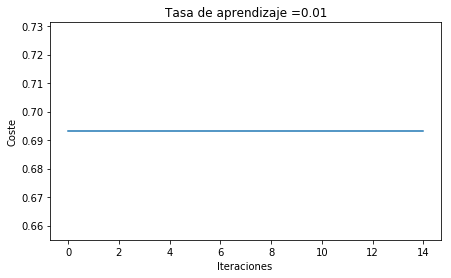

Sobre el conjunto de entrenamiento:
Precisión: 0.5
Sobre el conjunto de prueba:
Precisión: 0.5


In [26]:
parameters = model(train_X, train_Y, initialization = "ceros")
print ("Sobre el conjunto de entrenamiento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Sobre el conjunto de prueba:")
predictions_test = predict(test_X, test_Y, parameters)

El desempeño es bastante malo, y el coste  realmente no disminuye. De hecho, el algoritmo no mejora en nada unos resultados completamente aleatorios. Veamos con mayor detalle el resultado de las predicciones y la frontera de decisión/clasificación:

In [27]:
print ("Predicciones en entrenamiento = " + str(predictions_train))
print ("Predicciones en prueba = " + str(predictions_test))

Predicciones en entrenamiento = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
Predicciones en prueba = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


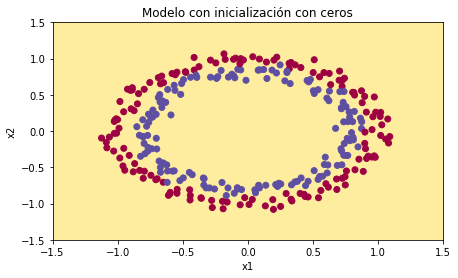

In [28]:
plt.title("Modelo con inicialización con ceros")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
Y2=train_Y.flatten()
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, Y2)

El modelo está prediciendo 0 para todo ejemplo (no hay frontera, todo es un mismo fondo)

En general, la inicialización a cero de los pesos resulta en una red que falla en romper la simetría. Esto significa que todas las neuronas de cada capa aprenden lo mismo, por lo cual daría lo mismo entrenar una red neuronal con una sola unidad, tal que $n^{[l]}=1$ en cada capa. De esta manera, la red no tiene un mayor poder discriminatorio que cualquier otro clasificador lineal como e.g. la regresión logística. 

<font color='blue'>
**Lo que debe aprender**:
- Los pesos $W^{[l]}$ deben ser inicializados aleatotriamente para romper la simetría. 
- No hay problema si se inicializan a cero los sesgos $b^{[l]}$. La simetría se rompe mientras $W^{[l]}$ sea inicializada aleatoriamente. 


## 3 - Inicialización aleatoria

Con el fin de romper la simetría, inicialicemos los pesos de manera aleatoria. De este modo, cada neurona puede aprender una función diferente a partir de los mismos datos de entrada. En este ejercicio, puede verificar lo que ocurre si los pesos son inicializados aleatoriamente, pero con valores muy grandes.  

**Ejercicio**: Implemente la siguiente función para inicializar los pesos con valores aleatorios grandes (multiplicados \*10) y los sesgos con ceros. Utilize `np.random.randn(..,..) * 10` para los pesos y `np.zeros((.., ..))` para los sesgos. La semilla `np.random.seed(..)` es utilizada para poder replicar los resultados sobre la inicialización aleatoria. 

In [41]:
# FUNCIÓN A CALIFICAR: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Input:
    layer_dims: arreglo (lista) python con el tamaño de cada capa.
    Output:
    parameters: diccionario python con los parámetros "W1", "b1", ..., "WL", "bL":
                    W1: matriz de pesos de dimensión (layers_dims[1], layers_dims[0])
                    b1: vector de sesgo de dimensión (layers_dims[1], 1)
                    ...
                    WL: matriz de pesos de dimensión  (layers_dims[L], layers_dims[L-1])
                    bL: vector de sesgo de dimensión (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # Semilla para replicar la inicialización aleatoria
    parameters = {}
    L = len(layers_dims)            # Número de capas
    
    for l in range(1, L):
        ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 2 líneas de código)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### TERMINE EL CÓDIGO AQUÍ ###

    return parameters

In [42]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


**Salida esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.82741481 -6.27000677]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Ejecute la siguiente celda para entrenar el modelo sobre 15,000 iteraciones utilizando la incialización aleatoria.

/Users/jfrank/OneDrive/MIIA/4. Cuarto_Semestre/Modelos_II/Taller_6/init_utils.py:79: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/jfrank/OneDrive/MIIA/4. Cuarto_Semestre/Modelos_II/Taller_6/init_utils.py:79: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Coste tras la iteración 0: inf
Coste tras la iteración 1000: 0.6230425273064677
Coste tras la iteración 2000: 0.5978231240114035
Coste tras la iteración 3000: 0.5636092668680056
Coste tras la iteración 4000: 0.550069237053669
Coste tras la iteración 5000: 0.544303157755308
Coste tras la iteración 6000: 0.5373267065419742
Coste tras la iteración 7000: 0.4677081444928594
Coste tras la iteración 8000: 0.3976098827690745
Coste tras la iteración 9000: 0.3934354642662573
Coste tras la iteración 10000: 0.3920074692738697
Coste tras la iteración 11000: 0.38907636744661855
Coste tras la iteración 12000: 0.3861186430643622
Coste tras la iteración 13000: 0.3849677149891035
Coste tras la iteración 14000: 0.3827447403129335


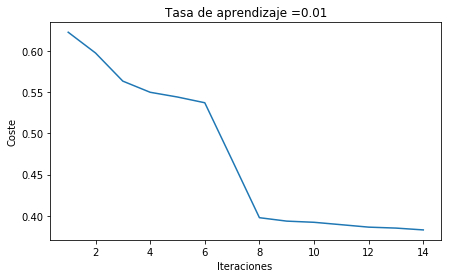

Sobre el conjunto de entrenamiento:
Precisión: 0.83
Sobre el conjunto de prueba:
Precisión: 0.86


In [43]:
parameters = model(train_X, train_Y, initialization = "random")
print ("Sobre el conjunto de entrenamiento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Sobre el conjunto de prueba:")
predictions_test = predict(test_X, test_Y, parameters)

Si aparece un "inf" en el coste tras la iteración 0, es por un redondeo numérico que se podría resolver por una implementación más detallada (que no es tan relevante para este ejercicio). 

De todos modos, se ha logrado romper la simetría. Esto también lleva a conseguir mejores resultados. 

In [44]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


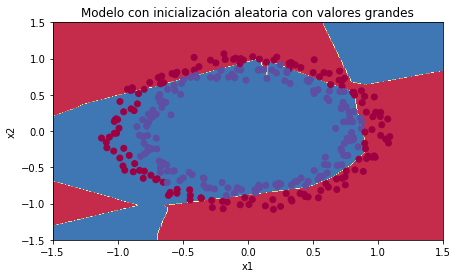

In [45]:
plt.title("Modelo con inicialización aleatoria con valores grandes")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, Y2)

**Observaciones**:
- El coste empieza bastante alto. Esto es porque se han utilizado valores aleatorios altos, y con valores altos, la salida de la última activación (sigmoide) obtiene valores muy cercanos a 0 o 1 para algunos ejemplos. Entonces, cuando clasifica mal esos ejemplos, incurre en una pérdida muy alta. De hecho, cuando $\log(a^{[3]}) = \log(0)$, la pérdida tiende a infinito.
- Una inicialización pobre puede llevar al problema de gradientes que desaparecen o que explotan, lo cual también llevaría a que el algoritmo de optimización vaya más despacio.  
- Si entrena esta red por más tiempo puede conseguir mejores resultados, pero inicializándola con valores aleatorios demasiado grandes hace que el tiempo de optimización sea más prolongado.

<font color='blue'>
**En resumen**:
- Inicializar los pesos con valores muy grandes no da buenos resultados. 
- Sería de esperar que inicializar con valores aleatorios pequeños obtenga mejores resultados. Sería relevante saber qué tan pequeños tendrían que ser estos valores aleatorios. 
    
<font color='black'>
Veamos el siguiente ejercicio.. 

**Ejercicio:** Verifique si es posible mejorar los resultados anteriores, obtenidos mediante la función `initialize_parameters_random(layers_dims)`, incializando los pesos de manera aleatoria pero con valores pequeños.
**Ayuda:** Utilice `np.random.randn(..,..) * k`, donde k es una constante que toma un valor pequeño.

### Solución

A continuación se verificará mediante el ajute de una nueva variable llamada K si se puede mejorar el modelo anteriormente planteado

In [58]:
# FUNCIÓN A CALIFICAR: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Input:
    layer_dims: arreglo (lista) python con el tamaño de cada capa.
    Output:
    parameters: diccionario python con los parámetros "W1", "b1", ..., "WL", "bL":
                    W1: matriz de pesos de dimensión (layers_dims[1], layers_dims[0])
                    b1: vector de sesgo de dimensión (layers_dims[1], 1)
                    ...
                    WL: matriz de pesos de dimensión  (layers_dims[L], layers_dims[L-1])
                    bL: vector de sesgo de dimensión (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # Semilla para replicar la inicialización aleatoria
    parameters = {}
    L = len(layers_dims)            # Número de capas
    k = 0.5
    
    for l in range(1, L):
        ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 2 líneas de código)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*k
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### TERMINE EL CÓDIGO AQUÍ ###

    return parameters

In [59]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.89431424  0.21825493  0.04824873]
 [-0.93174635 -0.1386941  -0.17737949]]
b1 = [[0.]
 [0.]]
W2 = [[-0.04137074 -0.31350034]]
b2 = [[0.]]


Coste tras la iteración 0: 0.7442418712431523
Coste tras la iteración 1000: 0.6955023459797313
Coste tras la iteración 2000: 0.6874215205303383
Coste tras la iteración 3000: 0.6787784939092091
Coste tras la iteración 4000: 0.6650760443522253
Coste tras la iteración 5000: 0.6351999467865572
Coste tras la iteración 6000: 0.5832511258005627
Coste tras la iteración 7000: 0.4956456946038003
Coste tras la iteración 8000: 0.3894831534037977
Coste tras la iteración 9000: 0.2958502055796256
Coste tras la iteración 10000: 0.22861889246830697
Coste tras la iteración 11000: 0.18161274169268424
Coste tras la iteración 12000: 0.14840372470146737
Coste tras la iteración 13000: 0.12438443578109264
Coste tras la iteración 14000: 0.1071478053608262


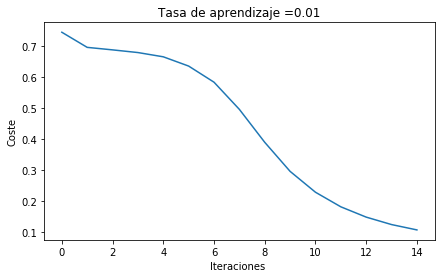

Sobre el conjunto de entrenamiento:
Precisión: 0.99
Sobre el conjunto de prueba:
Precisión: 0.95


In [60]:
parameters = model(train_X, train_Y, initialization = "random")
print ("Sobre el conjunto de entrenamiento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Sobre el conjunto de prueba:")
predictions_test = predict(test_X, test_Y, parameters)

In [61]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


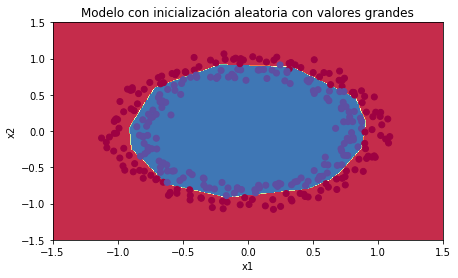

In [62]:
plt.title("Modelo con inicialización aleatoria con valores grandes")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, Y2)

Con el modelo anteriormente planteado se logró una precisión sobre el conjunto de prueba del 95%, mejorando considerablemente el desempeño del modelo (como se aprecia en la gráfica)

## 4 - Inicialización de He

Finalmente, apliquemos la inicialización de He. Este método fue presentado en el paper publicado por He et al., 2015. Es muy similar a la inicialización de Xavier, sólo que en la de Xavier los pesos  $W^{[l]}$ se multiplican por `sqrt(1./layers_dims[l-1])`, mientras que en la de He se multiplican por `sqrt(2./layers_dims[l-1])`.)

**Ejercicio**: Implemente la siguiente función para inicializar sus parámetros con el método de He.

**Ayuda**: Esta función es similar a la que previamente escribió `initialize_parameters_random(...)`. La única diferencia va a ser que en lugar de multiplicar `np.random.randn(..,..)` por 10, ahora se multiplica por $\sqrt{\frac{2}{\text{dimensión de la capa previa}}}$, que la que la inicialización de He recomienda para las capas con una activación ReLU. 

In [63]:
# FUNCIÓN A CALIFICAR: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Input:
    layer_dims: arreglo (lista) python con el tamaño de cada capa.
    Output:
    parameters: diccionario python con los parámetros "W1", "b1", ..., "WL", "bL":
                    W1: matriz de pesos de dimensión (layers_dims[1], layers_dims[0])
                    b1: vector de sesgo de dimensión (layers_dims[1], 1)
                    ...
                    WL: matriz de pesos de dimensión  (layers_dims[L], layers_dims[L-1])
                    bL: vector de sesgo de dimensión (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # número de capas
     
    for l in range(1, L + 1):
        ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 2 líneas de código)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/(layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### TERMINE EL CÓDIGO AQUÍ ###
        
    return parameters

In [64]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


**Salida esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Ejecute la celda abajo para entrenar el modelo sobre 15,000 iteraciones utilizando la inicialización de He.

Coste tras la iteración 0: 0.8830537463419761
Coste tras la iteración 1000: 0.6879825919728063
Coste tras la iteración 2000: 0.6751286264523371
Coste tras la iteración 3000: 0.6526117768893807
Coste tras la iteración 4000: 0.6082958970572938
Coste tras la iteración 5000: 0.5304944491717495
Coste tras la iteración 6000: 0.4138645817071795
Coste tras la iteración 7000: 0.31178034648444414
Coste tras la iteración 8000: 0.23696215330322565
Coste tras la iteración 9000: 0.18597287209206842
Coste tras la iteración 10000: 0.15015556280371808
Coste tras la iteración 11000: 0.12325079292273548
Coste tras la iteración 12000: 0.09917746546525934
Coste tras la iteración 13000: 0.08457055954024276
Coste tras la iteración 14000: 0.07357895962677365


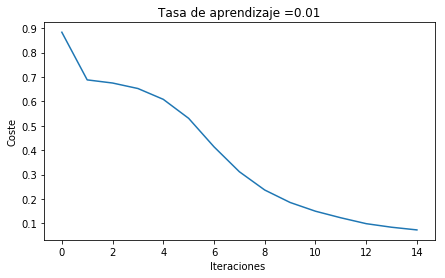

Sobre el conjunto de entrenamiento:
Precisión: 0.9933333333333333
Sobre el conjunto de prueba:
Precisión: 0.96


In [65]:
parameters = model(train_X, train_Y, initialization = "he")
print ("Sobre el conjunto de entrenamiento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Sobre el conjunto de prueba:")
predictions_test = predict(test_X, test_Y, parameters)

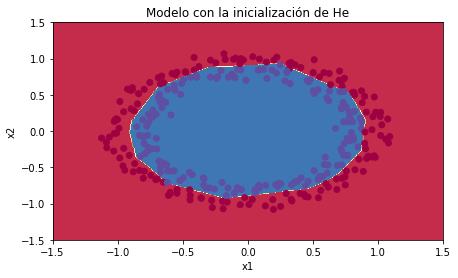

In [66]:
plt.title("Modelo con la inicialización de He")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, Y2)

**Observaciones**:
- El modelo con la inicialización de He separa muy bien los puntos rojos de los azules con unas pocas iteraciones.


## 5 - Conclusiones

Ha visto tres maneras diferentes de incializar los pesos. Para el mismo número de iteraciones y los mismos hiper-parámetros, la comparación es la siguiente:

<table> 
    <tr>
        <td>
        **Modelo**
        </td>
        <td>
        **Precisión de entrenamiento**
        </td>
        <td>
        **Comentario**
        </td>

    </tr>
        <td>
        Red de 3 capas con inicialización en ceros
        </td>
        <td>
        50%
        </td>
        <td>
        falla en romper la simetría
        </td>
    <tr>
        <td>
        Red de 3 capas con inicialización aleatoria con valores altos
        </td>
        <td>
        83%
        </td>
        <td>
        Pesos muy grandes 
        </td>
    </tr>
    <tr>
        <td>
        Red de 3 capas con inicialización de He
        </td>
        <td>
        99%
        </td>
        <td>
        método recomendado
        </td>
    </tr>
</table> 

<font color='blue'>
**En este taller debe haber aprendido a:**
- Inicializaciones diferentes llevan a resultados distintos
- La incialización aleatoria es usada para romper la simetría y asegurarse que las distintas unidades escondidas (neuronas) puedan aprender funciones distintas
- No inicialice con valores muy grandes
- La inicilización de He funciona bien con redes con activación tipo ReLU. 